In [1]:
#Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as metrics

In [2]:
#Import Dataset
data=pd.read_csv(r'C:\Users\Admin\Desktop\insurance_cost.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Let's check any duplicated data are there or not

data.duplicated().shape


(1338,)

In [6]:
# Let's check statistical details of each column

data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# Let's check how many unique elements in each column
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

<AxesSubplot:>

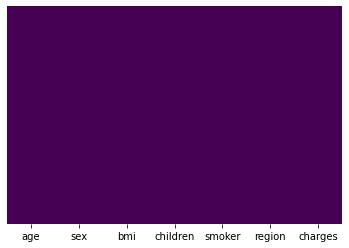

In [8]:
#if any null value is there or not
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

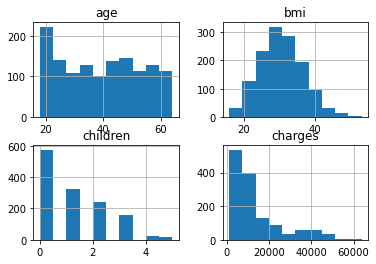

In [9]:
# Histogram presentation of each column
data.hist()

In [10]:
data.age.unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

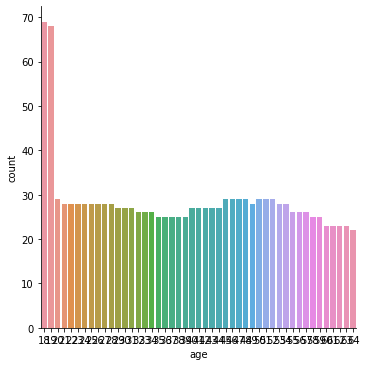

In [11]:
# Factorplot presentation of 'age' category. 
sns.factorplot('age',data=data,kind='count')

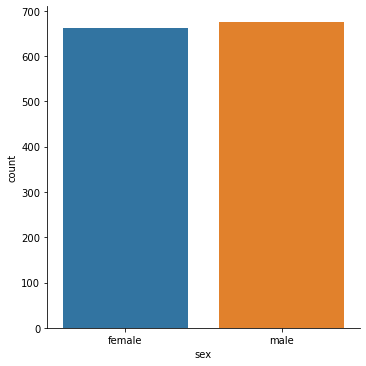

In [12]:
## Factorplot presentation of 'sex' category. 
sns.factorplot('sex',data=data,kind='count')

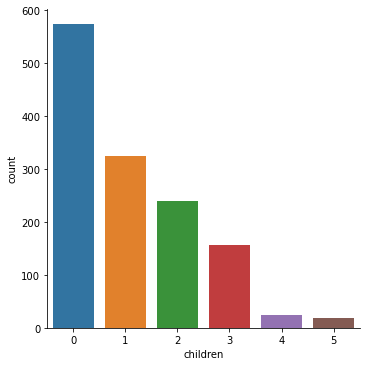

In [13]:
# Factorplot presentation of 'children' category. 
sns.factorplot('children',data=data,kind='count')

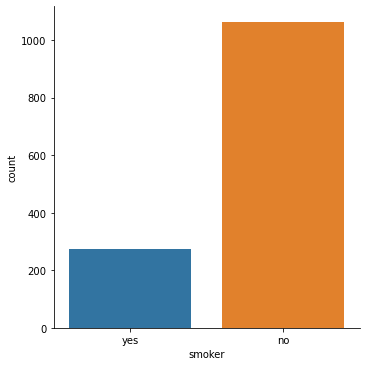

In [14]:
# Factorplot presentation of 'smoker' category. 
sns.factorplot('smoker',data=data,kind='count')

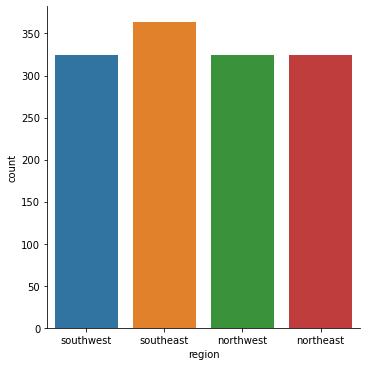

In [15]:
# Factorplot presentation of 'region' category. 
sns.factorplot('region',data=data,kind='count')

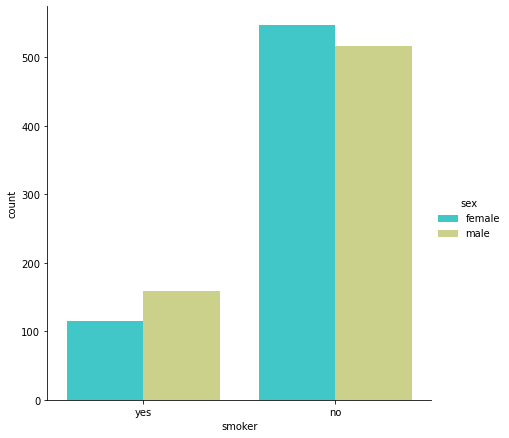

In [16]:
sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex",
            data=data, size = 6)

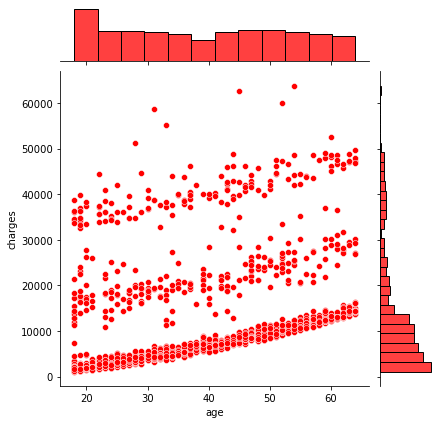

In [17]:
sns.jointplot(x='age',y='charges',data=data,color='r')

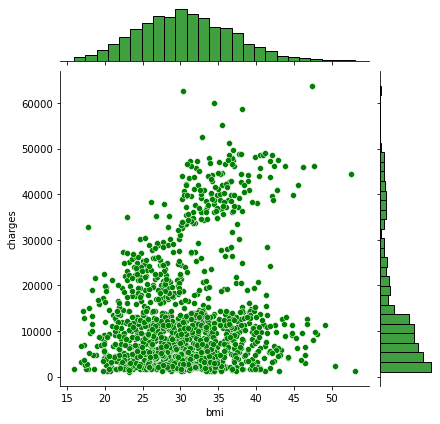

In [18]:
sns.jointplot(x='bmi',y='charges',data=data,color='g')

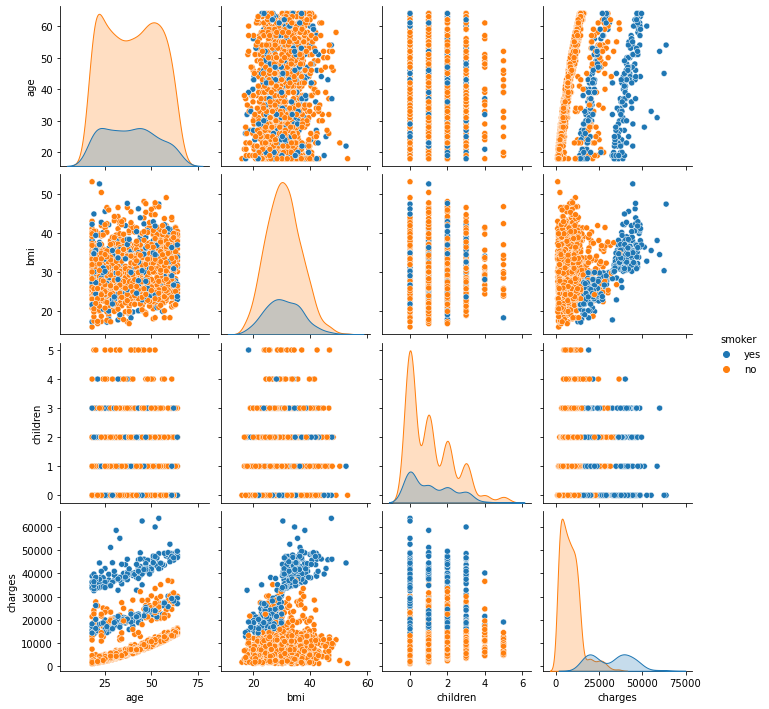

In [19]:
sns.pairplot(data,hue='smoker')

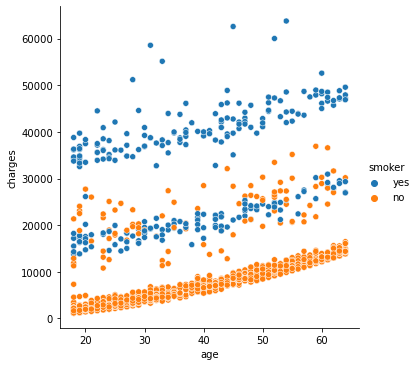

In [20]:
sns.relplot(x='age',y='charges',hue='smoker',data=data)

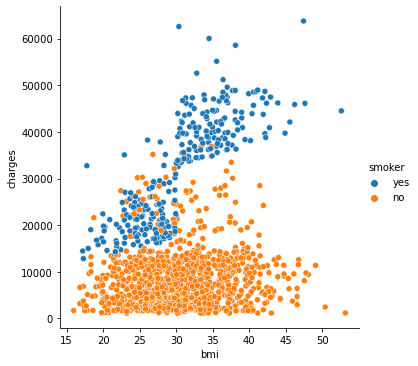

In [21]:
sns.relplot(x='bmi',y='charges',hue='smoker',data=data)

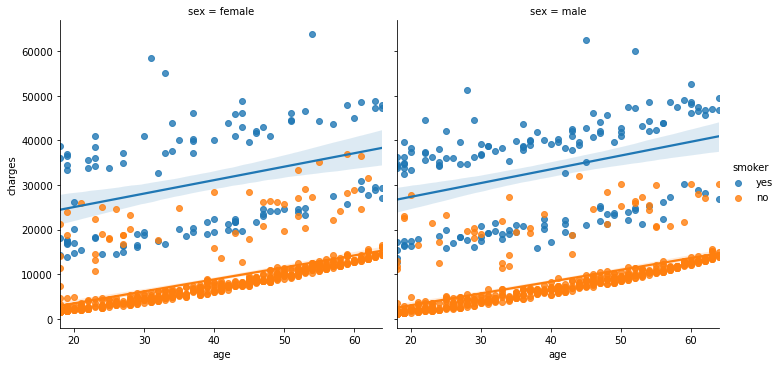

In [22]:
sns.lmplot(y='charges',x='age',hue='smoker',col='sex',data=data)

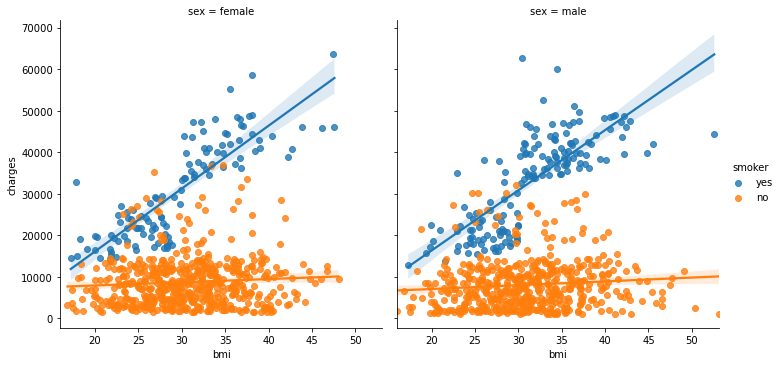

In [23]:
sns.lmplot(y='charges',x='bmi',hue='smoker',col='sex',data=data)

In [24]:
data.groupby('children').agg(['mean','min','max'])['charges']

,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


Text(0.5, 1.0, 'Box plot of charges vs children')

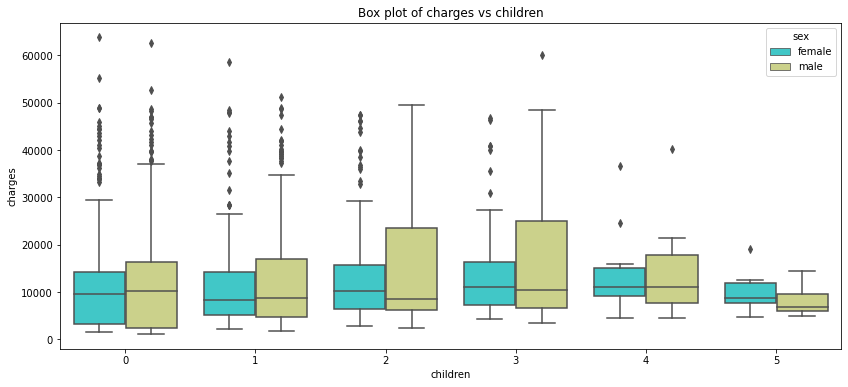

In [25]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges',hue='sex',data=data,palette='rainbow')
plt.title('Box plot of charges vs children')

In [26]:
# Converting categorical data into numerical data

enc=LabelEncoder()
data.sex=enc.fit_transform(data.sex)
data.smoker=enc.fit_transform(data.smoker)
data.region=enc.fit_transform(data.region)
data.sample(5)

,age,sex,bmi,children,smoker,region,charges
1149,42,1,34.10,0,0,3,5979.7310
1061,57,1,27.94,1,0,2,11554.2236
364,21,0,21.89,2,0,2,3180.5101
515,58,1,35.70,0,0,3,11362.7550
65,19,0,28.90,0,0,3,1743.2140


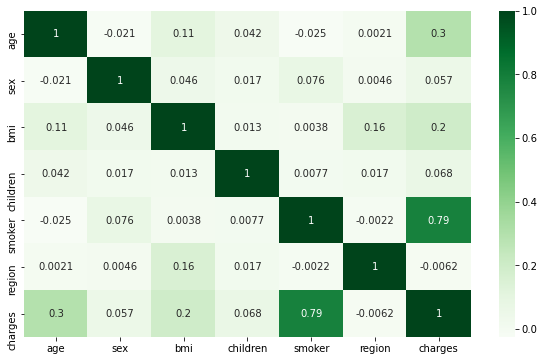

In [27]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap='Greens')
plt.show()


In [28]:
data.drop(['sex','region'],axis=1,inplace=True)

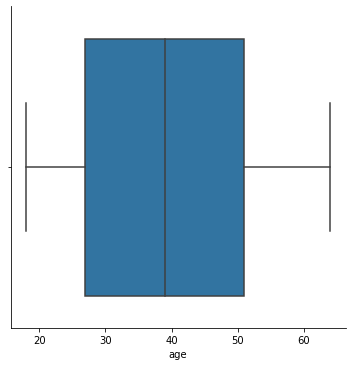

In [29]:
sns.catplot(x='age',kind='box',data=data)

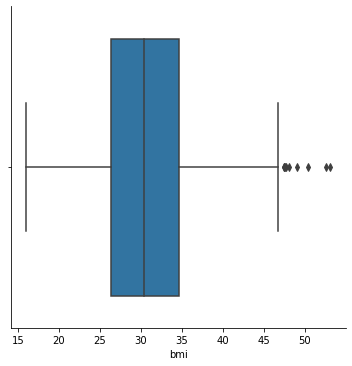

In [30]:
sns.catplot(x='bmi',kind='box',data=data)

<AxesSubplot:xlabel='bmi', ylabel='Density'>

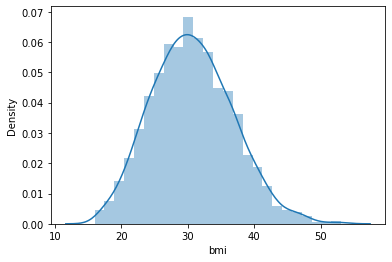

In [31]:
sns.distplot(data.bmi)

In [32]:
# Removal of ouliers of 'bmi' category

In [33]:
upper_lim=data['bmi'].quantile(.95)
lower_lim=data['bmi'].quantile(.05)
data=data[(data['bmi']<upper_lim) &(data['bmi']>lower_lim)]


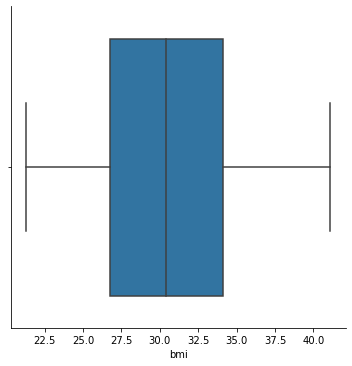

In [34]:
sns.catplot(x='bmi',kind='box',data=data)

<AxesSubplot:xlabel='bmi', ylabel='Density'>

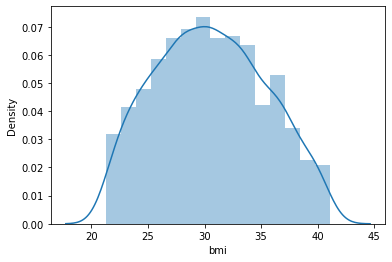

In [35]:
sns.distplot(data.bmi)

<AxesSubplot:xlabel='age', ylabel='Density'>

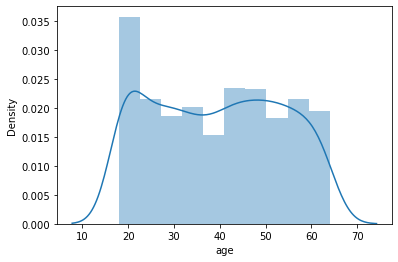

In [36]:
sns.distplot(data.age)

<AxesSubplot:xlabel='charges', ylabel='Density'>

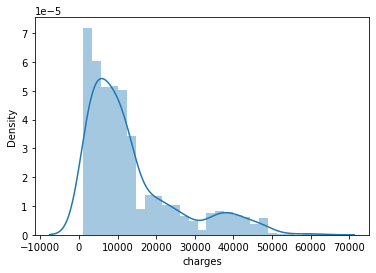

In [37]:
sns.distplot(data.charges)

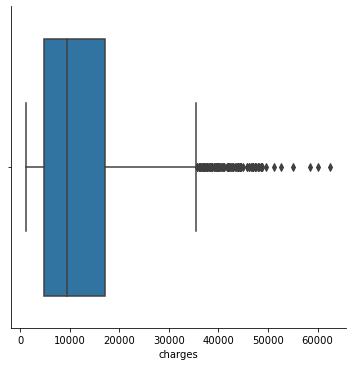

In [38]:
sns.catplot(x='charges',kind='box',data=data)

<AxesSubplot:xlabel='charges', ylabel='Density'>

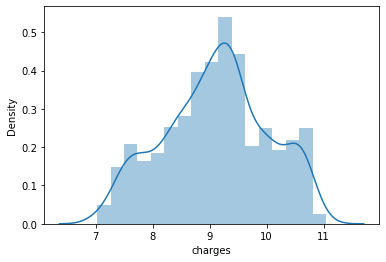

In [39]:
data["charges"] = np.log(data["charges"])

#Check the new distribution 
sns.distplot(data['charges'] )

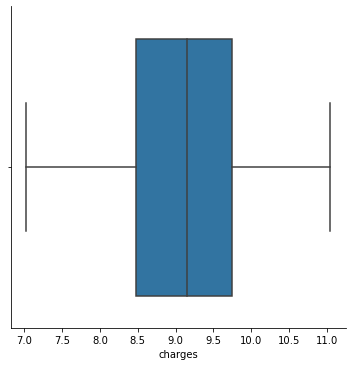

In [40]:
sns.catplot(x='charges',kind='box',data=data)

In [41]:
X=data.drop(['charges'],axis=1)
X.head(2)

,age,bmi,children,smoker
0,19,27.90,0,1
1,18,33.77,1,0


In [42]:
y=data.charges
y.head(2)

0    9.734176
1    7.453302
Name: charges, dtype: float64

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)


<AxesSubplot:xlabel='age', ylabel='Density'>

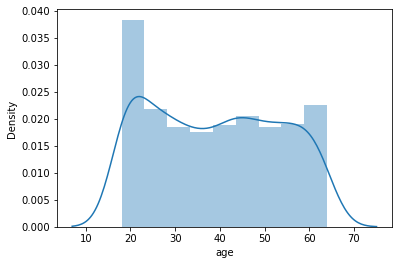

In [45]:
sns.distplot(X_train.age)


In [46]:
# Standardization of 'age','children' and 'bmi' category

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
X_train_stand=X_train.copy()
X_test_stand=X_test.copy()
num_cols=['age','children','bmi']

In [49]:
for i in num_cols:
     scale=StandardScaler().fit(X_train_stand[[i]])
     X_train_stand[i]=scale.transform(X_train_stand[[i]])
     X_test_stand[i]=scale.transform(X_test_stand[[i]])
    

In [50]:
# Applying Linear Regression Model

In [51]:
LR=LinearRegression()
LR.fit(X_train_stand,y_train)
y_predict=LR.predict(X_test_stand)
r2_score(y_test,y_predict)

0.773092528545724

In [52]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_predict)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_predict)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_predict))))

MAE: 0.26049073600285194
MSE: 0.17504145557722292
RMSE: 0.41837955922490155


Text(0.5, 1.0, 'Linear Regressor')

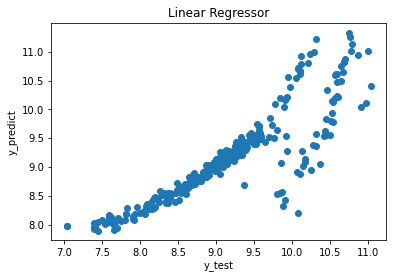

In [53]:
plt.scatter(y_test, y_predict)
plt.ylabel('y_predict')
plt.xlabel('y_test')
plt.title('Linear Regressor')

<AxesSubplot:ylabel='Density'>

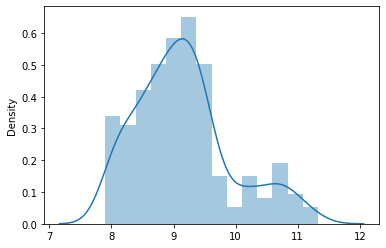

In [54]:
sns.distplot(y_predict)

In [55]:
# Applying Random Forest Regressor model

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
RF=RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
RF.fit(X_train_stand,y_train)
y_predict=RF.predict(X_test_stand)
r2_score(y_test,y_predict)

0.8169357402826456

In [58]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_predict)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_predict)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_predict))))

MAE: 0.21000762084197655
MSE: 0.14121982973817424
RMSE: 0.37579226939650345


<AxesSubplot:ylabel='Density'>

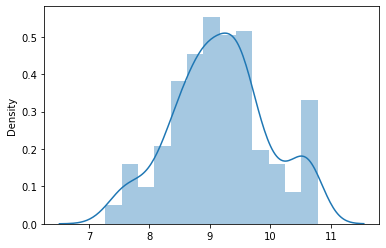

In [59]:
sns.distplot(y_predict)

Text(0.5, 1.0, 'RandomForestRegressor')

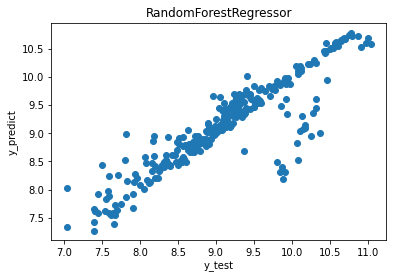

In [60]:
plt.scatter(y_test, y_predict)
plt.ylabel('y_predict')
plt.xlabel('y_test')
plt.title('RandomForestRegressor')

In [61]:
import xgboost 

In [62]:
xgb_model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=1000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

In [63]:
xgb_model.fit(X_train,y_train)
xgb_pred = xgb_model.predict(X_test)
r2_score(y_test,xgb_pred)

0.7359088160585331

In [64]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test,xgb_pred )))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, xgb_pred)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test,xgb_pred))))

MAE: 0.3111214838173318
MSE: 0.2037257960081832
RMSE: 0.45135994063295337


Text(0.5, 1.0, 'XGBoost')

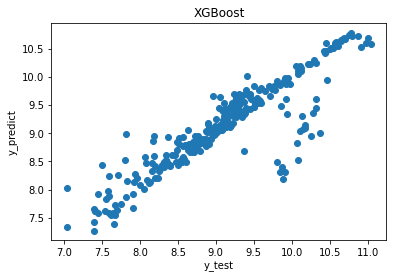

In [65]:
plt.scatter(y_test, y_predict)
plt.ylabel('y_predict')
plt.xlabel('y_test')
plt.title('XGBoost')

<AxesSubplot:ylabel='Density'>

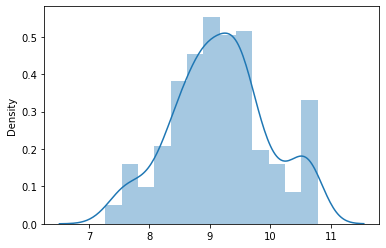

In [66]:
sns.distplot(y_predict)

In [67]:
from sklearn.svm import SVR #SVR-> Support Vector Regressor

In [68]:
from sklearn.model_selection import GridSearchCV
parameters={'kernel':['rbf'],
            'C':[1,10,100,50],
           'gamma':[0.01,0.1,0.5,1.0]}
grid_model=GridSearchCV(SVR(),parameters,verbose=0)
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10, 100, 50], 'gamma': [0.01, 0.1, 0.5, 1.0],
                         'kernel': ['rbf']})

In [69]:
grid_model.best_score_

0.8036206588345861

In [70]:
grid_model.best_params_

{'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}

In [71]:
SVM=SVR(C=50,gamma=0.01,kernel='rbf')# C=0.1 to 1000, gamma=0.01to 10
SVM.fit(X_train,y_train)
y_predict=SVM.predict(X_test)
r2_score(y_test,y_predict)

0.8460171067800233

In [72]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test,y_predict )))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_predict)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_predict))))


MAE: 0.16560441693800046
MSE: 0.11878581868842596
RMSE: 0.34465318609933954


Text(0.5, 1.0, 'SVM')

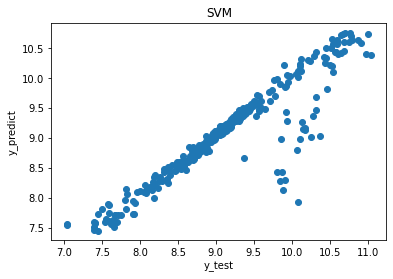

In [73]:
plt.scatter(y_test, y_predict)
plt.ylabel('y_predict')
plt.xlabel('y_test')
plt.title('SVM')

<AxesSubplot:ylabel='Density'>

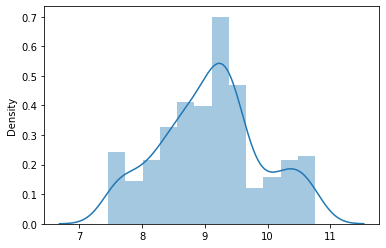

In [74]:
sns.distplot(y_predict)